In [34]:
import sys
sys.path.append('..')

from helper_fun import *
import helper_fun
from Split_functions_classify.splits_two import *
from Split_functions_classify.splits_three import *
from Split_functions_classify.splits_ten import *

from Split_functions_regression.split_furthest_cluster import *
SEED = 42
seed_everything(SEED)

compounds = pd.read_csv('../COVID_MOONSHOT/compounds_filtered.csv')
compounds.head(2)

,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427
1,36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,57.590417,45.077469,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac3530>,262.110613,2,1,3.41600,True,4.239650,4.346040


In [35]:
two_split(compounds)
three_split(compounds)
ten_split(compounds).head()



,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50,bin_2,bin_3,bin_10
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427,0,medium,2
1,36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,57.590417,45.077469,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac3530>,262.110613,2,1,3.41600,True,4.239650,4.346040,0,medium,1
2,126,Cc1c(N)cncc1NC(=O)Cc1cccc(Cl)c1,TRY-UNI-714a760b-3,4.222340,8.201698,<rdkit.Chem.rdchem.Mol object at 0x7fc31a435d20>,275.082540,3,2,2.80682,True,5.374447,5.086096,1,medium,5
3,129,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,TRY-UNI-714a760b-6,24.581194,13.895165,<rdkit.Chem.rdchem.Mol object at 0x7fc31a435e70>,260.071641,2,1,3.22462,True,4.609397,4.857136,0,medium,2
4,135,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,TRY-UNI-714a760b-12,64.508813,45.689263,<rdkit.Chem.rdchem.Mol object at 0x7fc31a436110>,261.066890,2,2,3.68742,True,4.190381,4.340186,0,medium,1


In [36]:
compound_df = compounds.copy()
compound_df["maccs"] = compound_df["SMILES"].apply(smiles_to_fp,)

In [37]:
fingerprint_to_model = compound_df.maccs.tolist()

# Bins 2 #

In [38]:
#change variables to _2 at end
label_to_model_2 = compound_df.bin_2.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_2,
    static_test_x_2,
    static_train_y_2,
    static_test_y_2,
) = train_test_split(fingerprint_to_model, label_to_model_2, test_size=0.2, random_state=SEED)
splits_2 = [static_train_x_2, static_test_x_2, static_train_y_2, static_test_y_2]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_2))
print("Test data size:", len(static_test_x_2))


# Set model parameter for random forest
param_2 = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF_2 = RandomForestClassifier(**param_2)

Training data size: 476
Test data size: 119


In [39]:
performance_measures = model_training_and_validation(model_RF_2, "RF", splits_2)

Sensitivity: 0.87
Specificity: 0.76
AUC: 0.89


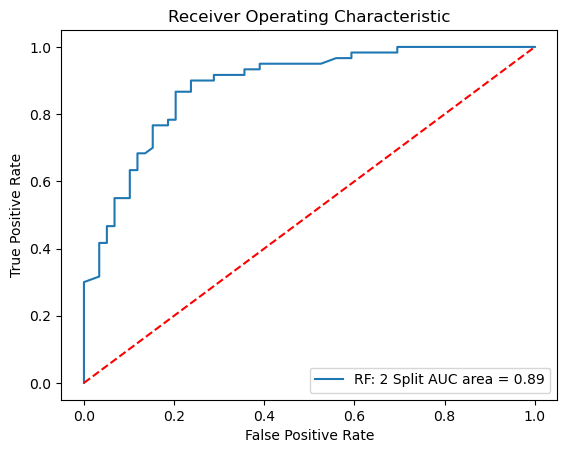

In [40]:
models = [{"label": "RF: 2 Split", "model": model_RF_2}]
plot_roc_curves_for_models(models, static_test_x_2, static_test_y_2,False);

### Now look at our RF bin 2 model after hyper-parameter tuning ###

In [41]:
from joblib import load

In [42]:
Optuna_model_RF_2 = load('Optuna_model_RF_2.pkl')

In [43]:
Optuna_model_RF_2.fit(static_train_x_2, static_train_y_2)

RandomForestClassifier(max_depth=21, n_estimators=14, random_state=42)

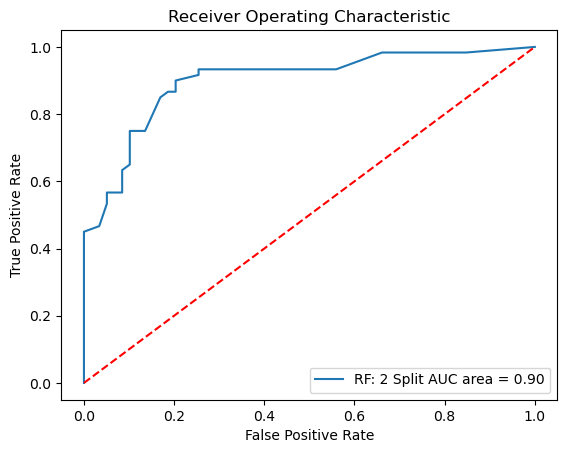

In [44]:
models = [{"label": "RF: 2 Split", "model": Optuna_model_RF_2}]
plot_roc_curves_for_models(models, static_test_x_2, static_test_y_2,False);


In [45]:
f1_score_2 = f1_score(static_test_y_2, Optuna_model_RF_2.predict(static_test_x_2))  
print("Our f1 score is: ", f1_score_2)

Our f1 score is:  0.8429752066115702


In [46]:
matthews_corrcoef_2 = matthews_corrcoef(static_test_y_2, Optuna_model_RF_2.predict(static_test_x_2))
print("Our matthews_corrcoef is: ", matthews_corrcoef_2)

Our matthews_corrcoef is:  0.6807007901021046


This is looking like a strong classifier model

# Bins 3 #

In [47]:
#change variables to _3 at end
label_to_model_3 = compound_df.bin_3.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_3,
    static_test_x_3,
    static_train_y_3,
    static_test_y_3,
) = train_test_split(fingerprint_to_model, label_to_model_3, test_size=0.2, random_state=SEED)
splits_3 = [static_train_x_3, static_test_x_3, static_train_y_3, static_test_y_3]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_3))
print("Test data size:", len(static_test_x_3))


# Set model parameter for random forest
param_3 = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF_3 = RandomForestClassifier(**param_3)

Training data size: 476
Test data size: 119


In [48]:
bins_label_3 = ['low','medium','high']
model_RF_3.fit(static_train_x_3,static_train_y_3)
test_prob_RF_3 = model_RF_3.predict_proba(static_test_x_3)

### Plot the ROC curves using One vs Rest and micro-averaging ###

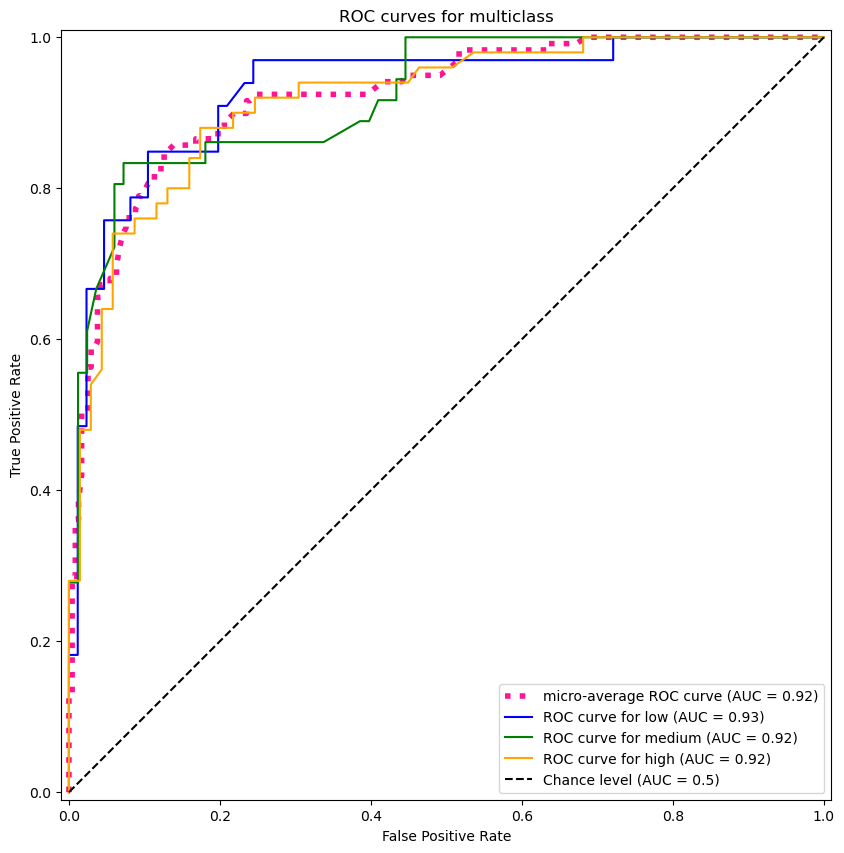

In [49]:
plot_roc_for_multi_class(model_RF_3,static_test_x_3,static_train_y_3,static_test_y_3,bins_label_3,True,True)

### MCC for 3 classes ###

In [50]:
y_pred_RF_3 = model_RF_3.predict(static_test_x_3)
matthews_corrcoef_RF_3 = matthews_corrcoef(static_test_y_3,y_pred_RF_3)
print("MCC:",matthews_corrcoef_RF_3)

MCC: 0.6996772329257254


### F1 for multi-class (3 classes here) ###

Have to specify average as this is not a binary class

In [51]:
f1_score_RF_3 = f1_score(static_test_y_3,y_pred_RF_3,average="micro")
print("F1 score using micro average is:",f1_score_RF_3)

F1 score using micro average is: 0.7983193277310925


In [52]:
f1_score_RF_3 = f1_score(static_test_y_3,y_pred_RF_3,average="macro")
print("F1 score using macro average is:",f1_score_RF_3)

F1 score using macro average is: 0.7966277147673524


### Look at RF bin 3 after Optuna ###

In [53]:
Optuna_model_RF_3 = load('Optuna_model_RF_3.pkl')
Optuna_model_RF_3.fit(static_train_x_3, static_train_y_3)

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=30,
                       random_state=42)

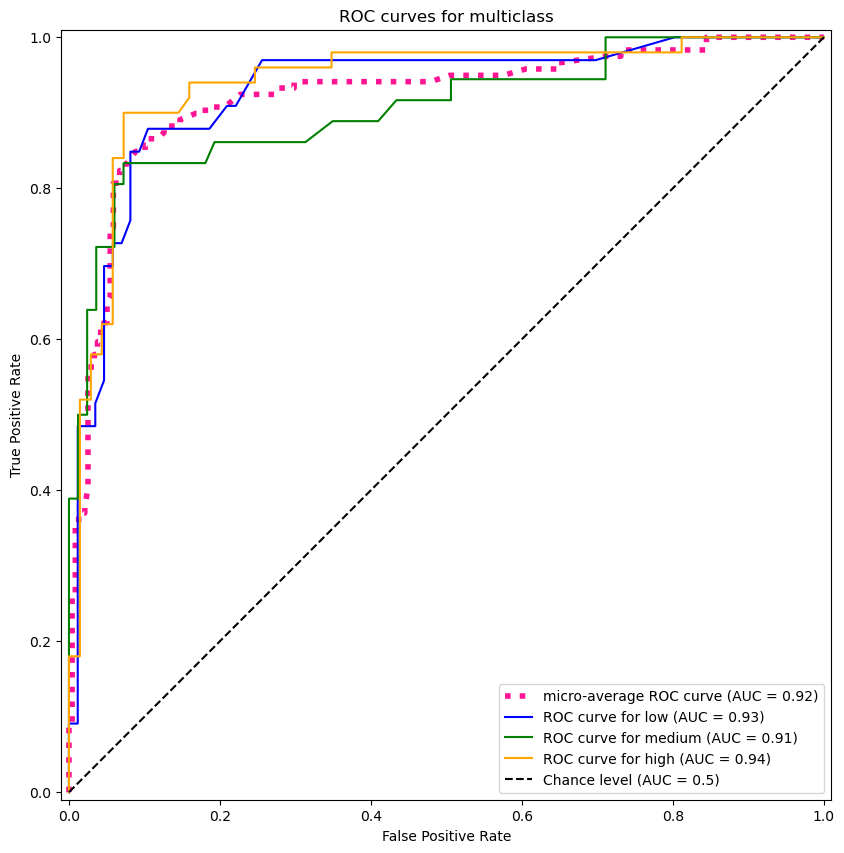

In [54]:
plot_roc_for_multi_class(Optuna_model_RF_3,static_test_x_3,static_train_y_3,static_test_y_3,bins_label_3,True,True)

We use micro-averaging here

In [55]:
f1_score_3 = f1_score(static_test_y_3, Optuna_model_RF_3.predict(static_test_x_3),average="micro")
print("Our f1 score is: ", f1_score_3)

Our f1 score is:  0.8487394957983193


We see an improvement in our f1 score after the hyper-parameter tuning

In [56]:
matthews_corrcoef_3 = matthews_corrcoef(static_test_y_3, Optuna_model_RF_3.predict(static_test_x_3))
print("Our matthews_corrcoef is: ", matthews_corrcoef_3)

Our matthews_corrcoef is:  0.7707794264577351


In [57]:
classif_report = classification_report(static_test_y_3, Optuna_model_RF_3.predict(static_test_x_3),target_names=bins_label_3,output_dict=True)
print(accuracy_score(static_test_y_3, Optuna_model_RF_3.predict(static_test_x_3)))

0.8487394957983193


In [58]:
pd.DataFrame(classif_report).T  

,precision,recall,f1-score,support
low,0.783784,0.878788,0.828571,33.000000
medium,0.903226,0.777778,0.835821,36.000000
high,0.862745,0.880000,0.871287,50.000000
accuracy,0.848739,0.848739,0.848739,0.848739
macro avg,0.849918,0.845522,0.845226,119.000000
weighted avg,0.853095,0.848739,0.848712,119.000000


In [59]:
confusion_matrix(static_test_y_3, Optuna_model_RF_3.predict(static_test_x_3))

array([[29,  1,  3],
       [ 4, 28,  4],
       [ 4,  2, 44]])

In [60]:
from sklearn.inspection import permutation_importance

feature_names = [f"feature {i}" for i in range(compound_df.maccs[0].shape[0])]
result = permutation_importance(Optuna_model_RF_3, static_test_x_3, static_test_y_3, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [61]:
pd.DataFrame(forest_importances).sort_values(by=0,ascending=False).head(40)

,0
feature 74,0.030252
feature 144,0.030252
feature 38,0.029412
feature 136,0.029412
feature 103,0.027731
feature 96,0.022689
feature 150,0.021849
feature 124,0.021849
feature 83,0.021008
feature 91,0.021008


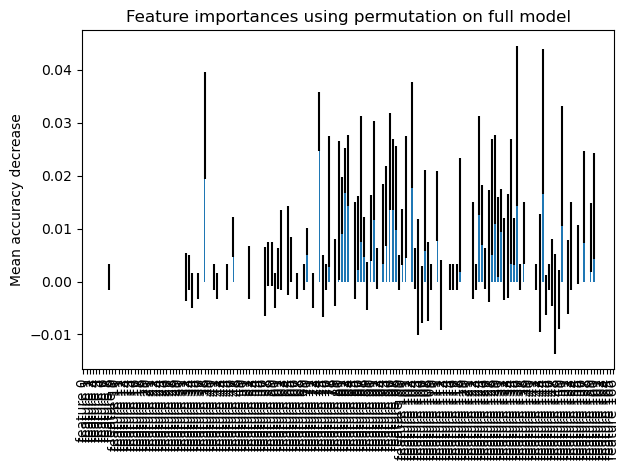

In [62]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [63]:
result.importances_std

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00252101, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00452535, 0.00336134, 0.00336134,
       0.        , 0.00252101, 0.        , 0.01011899, 0.        ,
       0.        , 0.00252101, 0.00252101, 0.        , 0.        ,
       0.00252101, 0.        , 0.0037581 , 0.        , 0.        ,
       0.        , 0.        , 0.00504202, 0.        , 0.        ,
       0.        , 0.        , 0.00650922, 0.00411679, 0.00411679,
       0.00336134, 0.0038509 , 0.00756303, 0.        , 0.00844527,
       0.00420168, 0.        , 0.00252101, 0.        , 0.00252101,
       0.00252101, 0.        , 0.00336134, 0.        , 0.00557

# Test on furthest cluster #

We define our model using the parameters we got from Optuna

In [64]:
model_RF_3 = load('Optuna_model_RF_3.pkl')

Create our furthest cluster splits

In [65]:
X_test_3_furth, X_train_3_furth, Y_test_3_furth, Y_train_3_furth = furthest_cluster_split(compounds, smiles_column="SMILES", CID_column="CID", pIC50_column="bin_3")

  0%|          | 0/595 [00:00<?, ?it/s][12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPRECATION WARNING: please use MorganGenerator
[12:24:34] DEPREC

Now train our model on the most similar compounds

In [66]:
X_train_3_furth = X_train_3_furth.to_list()
Y_train_3_furth = Y_train_3_furth.to_list()
X_test_3_furth = X_test_3_furth.to_list()
Y_test_3_furth = Y_test_3_furth.to_list()

In [68]:
model_RF_3.fit(X_train_3_furth, Y_train_3_furth)

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=30,
                       random_state=42)

### See how this model performs on the test set, furthest cluster ###

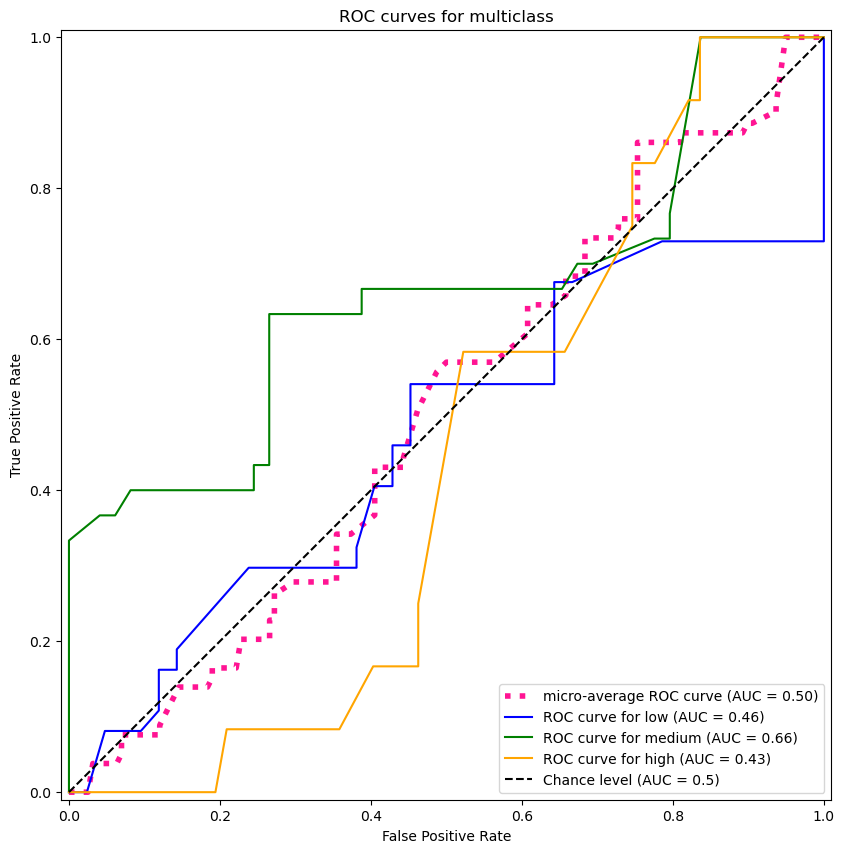

In [69]:
plot_roc_for_multi_class(model_RF_3,X_test_3_furth,Y_train_3_furth,Y_test_3_furth,bins_label_3,True,True)

So when we train our model on all the most similar compounds and the test on the most disimilar we get very bad results, essentianlly just a random guess for whether a compound us in a class or not, well actually worse for "low" and "high"

In [78]:
print(classification_report(Y_test_3_furth, model_RF_3.predict(X_test_3_furth),target_names=bins_label_3))

              precision    recall  f1-score   support

         low       0.36      0.49      0.41        37
      medium       1.00      0.07      0.12        30
        high       0.04      0.08      0.05        12

    accuracy                           0.27        79
   macro avg       0.47      0.21      0.20        79
weighted avg       0.55      0.27      0.25        79



This is really not looking good and shows that we must have some serious over-fitting for our model to be looking so good on our random 80/20 split

# Bins 10 #

In [ ]:
#change variables to _10 at end
label_to_model_10 = compound_df.bin_10.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_10,
    static_test_x_10,
    static_train_y_10,
    static_test_y_10,
) = train_test_split(fingerprint_to_model, label_to_model_10, test_size=0.2, random_state=SEED)
splits_10 = [static_train_x_10, static_test_x_10, static_train_y_10, static_test_y_10]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_10))
print("Test data size:", len(static_test_x_10))


# Set model parameter for random forest
param_10 = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF_10 = RandomForestClassifier(**param_10)

Training data size: 476
Test data size: 119


In [ ]:
bins_label_10 = ['0','1','2','3','4','5','6','7','8','9']
model_RF_10.fit(static_train_x_10,static_train_y_10)
test_prob_RF_10 = model_RF_10.predict_proba(static_test_x_10)

### Plot the ROC curves using One vs Rest and micro-averaging ###

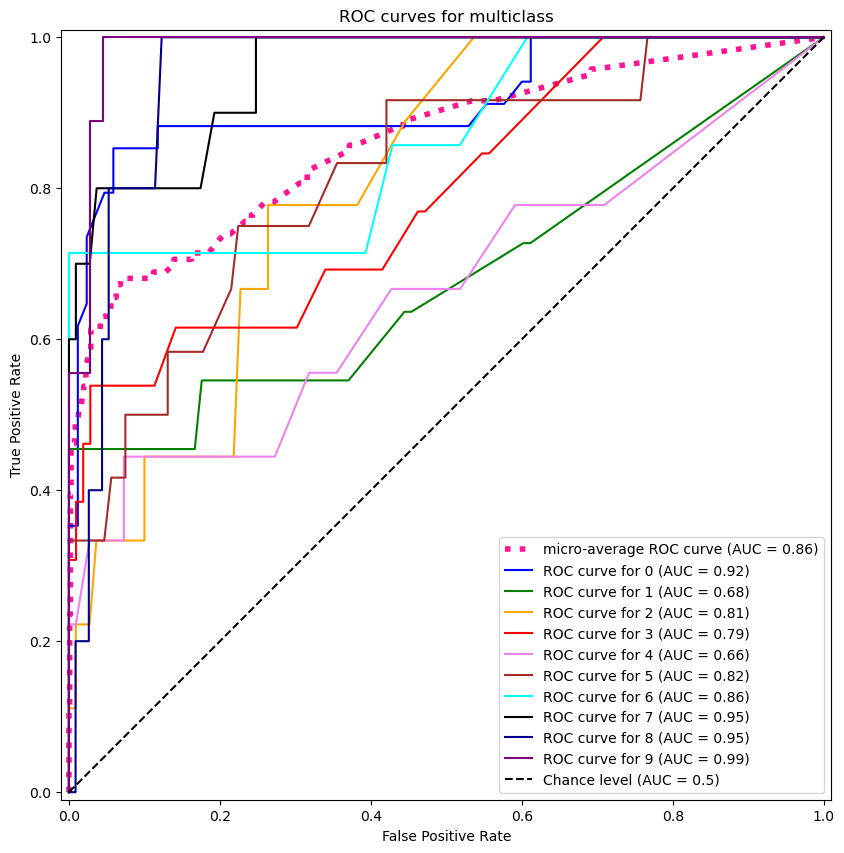

In [ ]:
plot_roc_for_multi_class(model_RF_10,static_test_x_10,static_train_y_10,static_test_y_10,bins_label_10,True,True)

### MCC for 10 classes ###

In [ ]:
y_pred_RF_10 = model_RF_10.predict(static_test_x_10)
matthews_corrcoef_RF_10 = matthews_corrcoef(static_test_y_10,y_pred_RF_10)
print("MCC:",matthews_corrcoef_RF_10)

MCC: 0.5286833812814858


### F1 for multi-class 10 classes here ###

Have to specify average as this is not a binary class

In [ ]:
f1_score_RF_10 = f1_score(static_test_y_10,y_pred_RF_10,average="micro")
print("F1 score using micro average is:",f1_score_RF_10)

F1 score using micro average is: 0.5966386554621849


In [ ]:
f1_score_RF_10 = f1_score(static_test_y_10,y_pred_RF_10,average="macro")
print("F1 score using macro average is:",f1_score_RF_10)

F1 score using macro average is: 0.5427974971964742


### RF 10 bin after Optuna ###

In [ ]:
Optuna_model_RF_10 = load('Optuna_model_RF_10.pkl')
Optuna_model_RF_10.fit(static_train_x_10, static_train_y_10)

RandomForestClassifier(max_depth=17, min_samples_split=3, n_estimators=180,
                       random_state=42)

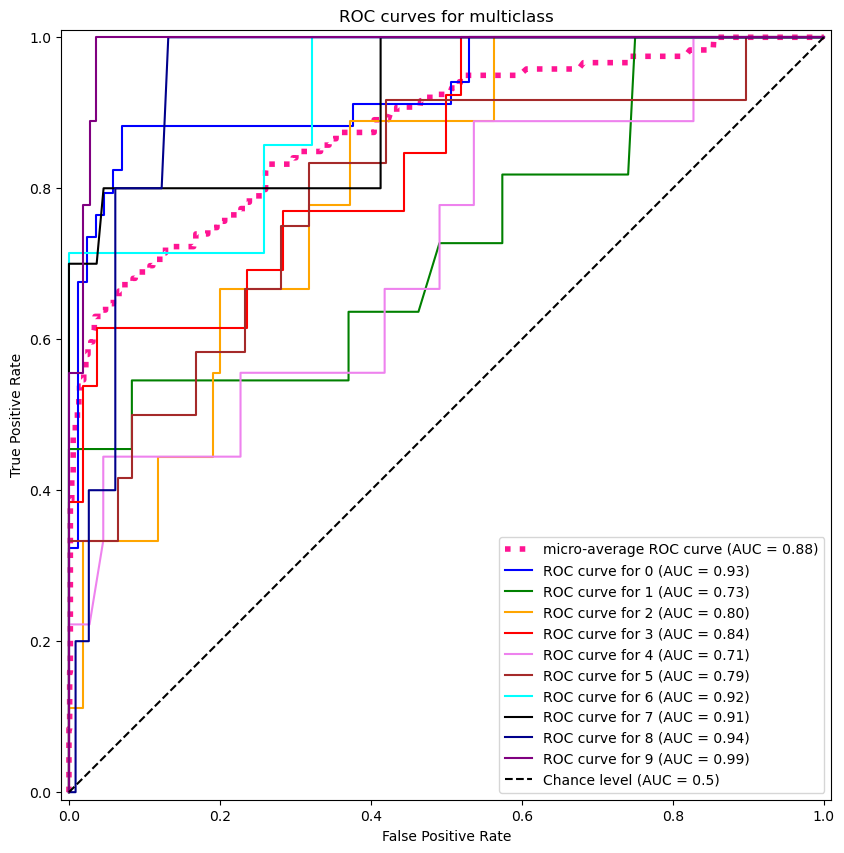

In [ ]:
plot_roc_for_multi_class(Optuna_model_RF_10,static_test_x_10,static_train_y_10,static_test_y_10,bins_label_10,True,True)

We use micro-averaging here

In [ ]:
f1_score_10 = f1_score(static_test_y_10, Optuna_model_RF_10.predict(static_test_x_10),average="micro")
print("Our f1 score is: ", f1_score_10)

Our f1 score is:  0.6218487394957983


In [ ]:
matthews_corrcoef_10 = matthews_corrcoef(static_test_y_10, Optuna_model_RF_10.predict(static_test_x_10))
print("Our matthews_corrcoef is: ", matthews_corrcoef_10)

Our matthews_corrcoef is:  0.5584607685405089
